### Classifying Fashion Items with a K-Nearest Neighbors Model

In [5]:
import gzip
import matplotlib.pyplot as plt
import numpy as np
import os
import requests
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [2]:
'''
Download and store data from the
Fashion MNIST dataset
'''

def download_fashion_mnist(url, file_name):
    '''
    Download data from the 'url' and save
    it in the directory as 'file_name'
    '''

    if not os.path.exists(file_name):
        r = requests.get(url)
        with open(file_name, 'wb') as f:
            f.write(r.content)

def load_fashion_mnist(image_file, label_file):
    '''
    Read in the binary 'image_file' and
    'label_file' data as NumPy arrays
    '''

    with gzip.open(image_file, 'rb') as f:
        images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)

    with gzip.open(label_file, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)

    return images, labels

image_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz'
label_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz'

image_file = 'train-images-idx3-ubyte.gz'
label_file = 'train-labels-idx1-ubyte.gz'

download_fashion_mnist(image_url, image_file)
download_fashion_mnist(label_url, label_file)

train_images, train_labels = load_fashion_mnist(image_file, label_file)

test_image_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz'
test_label_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz'

test_image_file = 't10k-images-idx3-ubyte.gz'
test_label_file = 't10k-labels-idx1-ubyte.gz'

download_fashion_mnist(test_image_url, test_image_file)
download_fashion_mnist(test_label_url, test_label_file)

test_images, test_labels = load_fashion_mnist(test_image_file, test_label_file)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

10 random images:


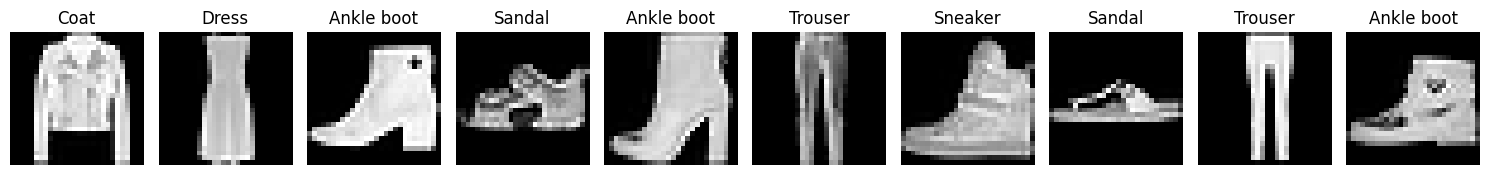


Within the training set: 6000 items were a T-shirt/top,
                         6000 items were a Trouser,
                         6000 items were a Pullover,
                         6000 items were a Dress,
                         6000 items were a Coat,
                         6000 items were a Sandal,
                         6000 items were a Shirt,
                         6000 items were a Sneaker,
                         6000 items were a Bag, and
                         6000 items were an Ankle boot

Within the testing set: 1000 items were a T-shirt/top,
                        1000 items were a Trouser,
                        1000 items were a Pullover,
                        1000 items were a Dress,
                        1000 items were a Coat,
                        1000 items were a Sandal,
                        1000 items were a Shirt,
                        1000 items were a Sneaker,
                        1000 items were a Bag, and
                      

In [3]:
'''
Display a random selection of images with their corresponding
labels

Then show how many images from the training and testing set
belong to each label
'''

all_images, all_labels = np.concatenate((train_images, test_images), axis=0), np.concatenate((train_labels, test_labels), axis=0)

random_images, random_labels = [], []
for _ in range(10):
    random_index = np.random.randint(0, 70000)
    random_images.append(all_images[random_index])
    random_labels.append(all_labels[random_index])

random_images, random_labels = np.array(random_images), np.array(random_labels)

print('10 random images:')

fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i in range(10):
    axes[i].imshow(random_images[i], cmap='gray')
    axes[i].set_title(class_names[random_labels[i]])
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
plt.tight_layout()
plt.show()

print()

label_count_train = np.bincount(train_labels)
label_count_test = np.bincount(test_labels)

print(f'''Within the training set: {label_count_train[0]} items were a T-shirt/top,
                         {label_count_train[1]} items were a Trouser,
                         {label_count_train[2]} items were a Pullover,
                         {label_count_train[3]} items were a Dress,
                         {label_count_train[4]} items were a Coat,
                         {label_count_train[5]} items were a Sandal,
                         {label_count_train[6]} items were a Shirt,
                         {label_count_train[7]} items were a Sneaker,
                         {label_count_train[8]} items were a Bag, and
                         {label_count_train[9]} items were an Ankle boot\n''')
print(f'''Within the testing set: {label_count_test[0]} items were a T-shirt/top,
                        {label_count_test[1]} items were a Trouser,
                        {label_count_test[2]} items were a Pullover,
                        {label_count_test[3]} items were a Dress,
                        {label_count_test[4]} items were a Coat,
                        {label_count_test[5]} items were a Sandal,
                        {label_count_test[6]} items were a Shirt,
                        {label_count_test[7]} items were a Sneaker,
                        {label_count_test[8]} items were a Bag, and
                        {label_count_test[9]} items were an Ankle boot\n''')
print('Both sets have uniform frequency for each fashion item: 0.1')

In [6]:
'''
Normalize the training and testing images to
conform to a Gaussian distribution with mean 0
and standard deviation of 1. Essentially mapping
every data point into its corresponding amount in
standard deviations

Then build a K-Nearest Neighbor classifier on
the normalized training data and use it to
classify 25 random normalized testing images
'''

train_mean, test_mean = np.mean(train_images), np.mean(test_images)
train_std, test_std = np.std(train_images), np.std(test_images)

train_normalized, test_normalized = (train_images - train_mean) / train_std, (test_images - test_mean) / test_std

random_test_images, random_test_labels = [], []
random_indices = []
for _ in range(25):
    random_index = np.random.randint(0, 10000)
    random_test_images.append(test_normalized[random_index])
    random_test_labels.append(test_labels[random_index])
    random_indices.append(random_index)

random_test_images, random_test_labels = np.array(random_test_images), np.array(random_test_labels)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(train_normalized.reshape(60000, -1), train_labels)

test_predicted_labels = knn_classifier.predict(random_test_images.reshape(25, -1))

A = np.stack((random_test_labels, test_predicted_labels), axis=1)

for i in range(25):
    if A[i][0] == A[i][1]:
        print(f'Sample {random_indices[i]} - predicted output: {A[i][1]}, correct')
    else:
        print(f'Sample {random_indices[i]} - predicted output: {A[i][1]}, wrong: actual is {A[i][0]}')

Sample 4753 - predicted output: 3, correct
Sample 4002 - predicted output: 9, correct
Sample 154 - predicted output: 5, correct
Sample 6023 - predicted output: 0, wrong: actual is 6
Sample 516 - predicted output: 5, correct
Sample 2369 - predicted output: 8, correct
Sample 9692 - predicted output: 0, wrong: actual is 6
Sample 8234 - predicted output: 5, correct
Sample 1014 - predicted output: 8, correct
Sample 6795 - predicted output: 7, correct
Sample 7355 - predicted output: 2, correct
Sample 9297 - predicted output: 6, correct
Sample 3825 - predicted output: 7, correct
Sample 5691 - predicted output: 8, correct
Sample 2791 - predicted output: 4, correct
Sample 3533 - predicted output: 3, correct
Sample 4284 - predicted output: 7, correct
Sample 9812 - predicted output: 1, correct
Sample 6906 - predicted output: 3, correct
Sample 6881 - predicted output: 2, correct
Sample 3346 - predicted output: 8, correct
Sample 2651 - predicted output: 7, correct
Sample 6977 - predicted output: 7,

In [ ]:
'''
Implement metrics to gauge the overall accuracy of
the K-Nearest Neighbor classifier

The overall and per-class accuracy will be measured.
Per-class accuracy will also be represented by a
'confusion matrix' that shows the frequency of actual
and predicted class pairs

The confusion matrix should ideally be diagonal due
to matching actual and predicted classes
'''

def compute_accuracy(T, _):
    '''
    Given pairs (actual class, predicted class)
    from 'T', return the ratio of correct to
    total guesses
    '''

    total_correct = 0

    for actual, predicted in T:
        if actual == predicted:
            total_correct += 1

    return total_correct / len(T)

def compute_per_class_accuracy(T, n):
    '''
    Given pairs (actual class, predicted class)
    from 'T', return the ratio of correct to
    total guesses for each class
    '''

    frequency_counts, total_counts = [0 for _ in range(n)], [0 for _ in range(n)]

    for i, j in T:
        total_counts[i] += 1
        if i == j:
            frequency_counts[i] += 1

    return [freq / total if total != 0 else 0 for freq, total in zip(frequency_counts, total_counts)]

def compute_confusion_matrix(T, N):
    '''
    Given pairs (actual class, predicted class)
    from 'T', return the confusion matrix

    Every entry i, j in the matrix represents the
    frequency of actual class i and predicted
    class j
    '''

    confusion_matrix = [[0 for _ in range(N)] for _ in range(N)]

    for actual, predicted in T:
        confusion_matrix[actual][predicted] += 1

    return np.array(confusion_matrix)